## HW2, due March 3rd by end of day.
### Submit one ipynb in moodle, name your file HW2.firstname.lastname.ipynb

### Task 1: build a CNN that can achieve accuracy >= 99.2% on test data for the mnist digit dataset.
- Plot train and test accuracy vs epoch. Also print out max of test accuracy
- Comparing your CNN and the multiple-layer neural network you experimented in HW1, what, in your opinion, help the CNN to obtain a better accuracy?

(If your test accuracy cannot reach 99.2%, for each 0.1% below 99.2%, you lose 1 point.)

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D,Reshape, Flatten, MaxPooling2D, Dropout, Lambda, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, Callback
import time
import pickle
import gzip
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='latin1')
f.close()

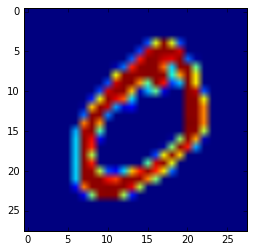

In [25]:
plt.imshow(train_set[0][1].reshape((28,28)))

In [26]:
img_dim = train_set[0].shape[1]
print(img_dim)
n_class = 10

784


In [12]:
# This is able to achieve 99.24%

# model = Sequential()
# model.add(Reshape((28,28,1),input_shape=(img_dim,)))
# model.add(Convolution2D(32,5,5,activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Convolution2D(32,3,3,activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Flatten())
# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.75))
# model.add(Dense(n_class, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [9]:
model = Sequential()
model.add(Reshape((28,28,1),input_shape=(img_dim,)))
model.add(Convolution2D(32,5,5))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(32,3,3))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(n_class, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
reshape_2 (Reshape)              (None, 28, 28, 1)     0           reshape_input_2[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 24, 24, 32)    832         reshape_2[0][0]                  
____________________________________________________________________________________________________
batchnormalization_4 (BatchNorma (None, 24, 24, 32)    128         convolution2d_4[0][0]            
____________________________________________________________________________________________________
leakyrelu_4 (LeakyReLU)          (None, 24, 24, 32)    0           batchnormalization_4[0][0]       
___________________________________________________________________________________________

In [10]:
%time history = model.fit(train_set[0],train_set[1],batch_size=128, nb_epoch=50,verbose=0,validation_data=(valid_set[0],valid_set[1]))

CPU times: user 5min 23s, sys: 41.9 s, total: 6min 5s
Wall time: 5min 22s


validatiaon acc = 0.994


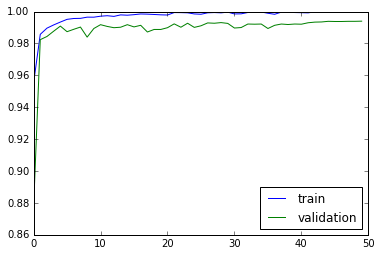

In [11]:
acc_train = history.history['acc']
acc_val = history.history['val_acc']
print('validatiaon acc = {}'.format(acc_val[-1]))
plt.plot(acc_train,label = 'train')
plt.plot(acc_val,label='validation')
plt.legend(loc=4)

### Task 2: try a mini-vgg net on cifar-10 dataset.
Download cifar-10 from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Unzip and extract files into a directory named "cifar-10-batches-py".

Implement a mini-vgg net that has the following configuration:

(conv_3x3x32, conv_3x3x32, maxpool_2x2, \*, conv_3x3x64, conv_3x3x64, maxpool_2x2, \*, fc, \*, softmax)

fc = fully connected, i.e., dense layer in keras.
softmax = dense layer with softmax activation.
And you can add optional dropout layers at places indicated by '\*'. Report the following:

- How long for it to train 10 epoches?
- Plot both training and testing accuracy vs epoch. What is the best test accuracy you can achieve?

(If your computer is powerful enough, you should run enough training epoches until the training accuracy levels. Otherwise, run training overnight.)

## A simple CNN example on cifar-10 data

In [2]:
import pickle
def load_cifar_data():
    X = []
    y = []
    for i in range(1, 6):
        f = open('cifar-10-batches-py/data_batch_%i' % i, 'rb')
        data = pickle.load(f,encoding='latin1')
        f.close()
        X.append(data['data'])
        y.extend(data['labels'])
    X = np.vstack(X)

    f = open('cifar-10-batches-py/test_batch', 'rb')
    data = pickle.load(f,encoding='latin1')
    f.close()
    Xt = data['data']
    yt = data['labels']
    
    return X.reshape((-1, 3, 32, 32))/255., np.array(y)[:, None], Xt.reshape((-1, 3, 32, 32))/255., np.array(yt)[:, None]

[9]


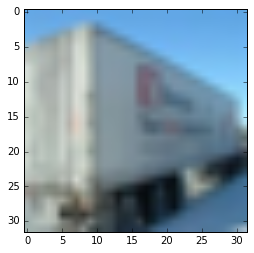

In [3]:
# load data
X, y_train, Xt, y_val = load_cifar_data()

# Change the images data from [3,32,32] to [32,32,3]
X_train = []
X_val = []
for x in X:
    X_train.append(np.transpose(x,[1, 2, 0]))
X_train = np.array(X_train)
for x in Xt:
    X_val.append(np.transpose(x,[1, 2, 0]))
X_train = np.array(X_train)
X_val = np.array(X_val)
img_dim = X_train[0].shape
print(y_train[15])
plt.imshow(X_train[15])

In [4]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape= img_dim))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
%time h = model.fit(X_train, y_train, batch_size=500, nb_epoch=200, validation_data=(X_val, y_val),verbose=0)

CPU times: user 24min 22s, sys: 4min 49s, total: 29min 11s
Wall time: 39min 18s


training accuracy:0.8797400289773941
validattion accuracy:0.8236000120639801
No. epoch with best accurary: 195


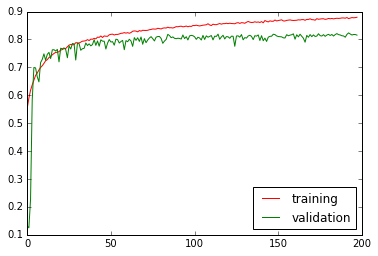

In [6]:
ptrain = h.history['acc']
pvalidataion = h.history['val_acc']
plt.plot(ptrain[2:], 'r',label='training')
plt.plot(pvalidataion[2:], 'g',label='validation')
plt.legend(loc=4)
print("training accuracy:{}\nvalidattion accuracy:{}\nNo. epoch with best accurary: {}".format(np.max(ptrain), np.max(pvalidataion), 1+np.argmax(pvalidataion)))